# FIT5196 Assessment 1 - Task 2

Date: 15/04/2019

Version: 1.0

Environment: Python 3.6.5 and Anaconda 4.4.10 (64-bit)

Libraries used:
* re 2.2.1 (for regular expression, included in Anaconda Python 3.6) 
* PyPDF2 (for reading the PDF file)
* nltk 3.3 (for various functionality of nltk)
* FreqDist (for calculaing the frequency distribution of words)
* nltk.tokenize (for RegexpTokenizer, MWETokenizer to tokenise the data)
* matplotlib.pyplot (for plotting some basic charts)
* nltk.stem (for PorterStemmer to Stem the tokens)
* itertools (for chain to get all the words from the dictionary values)
* collections (for counting the frequency of items in a list)
* pylab (for plotting one of the charts)
* numpy (for some basic stats calculation)

## 0. Assumption
The input file `29620163.pdf` and the stop words file `./stopwords_en/stopwords_en.txt` is in the current directory. 



## 1. Introduction
This assignament needs the html data given to be parsed using regular expressions and dump the data into required json and xml format. The input data is in the file `29620163.pdf`. 




## 2.  Import libraries 

In [1]:
import re
import PyPDF2
import nltk
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import MWETokenizer
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from itertools import chain
import collections
from pylab import *
import numpy as np
%matplotlib inline 

The steps to get the final vocab are as follows:
1. Read the pdf file.
2. Tokenise and Normalise the tokens.
3. Extract first 200 meaningful bigrams.
4. Retokenise using MWETokeniser.
5. Remove context-independent stop words from the bag of words using the file provided.
6. Remove the context-dependent stop words using the 95% threshold.
7. Remove the rare tokens using the 5% threshold.
8. Stemming of tokens using PorterStemmer.
9. Create the 29620163_vocab.txt and 29620163_countVec.txt file as output in the desired format. 

Each of these steps are explained in detail below in their respective sections.

## 3. Read PDF file
File is read using a PyPDF2 library as shown in the below code. 
The read contents are concatenated in one big string.

In [2]:
pdf_file = open('29620163.pdf', 'rb')
read_pdf = PyPDF2.PdfFileReader(pdf_file)
file_contents = ""
number_of_pages = read_pdf.getNumPages()
for pageid in range(0,number_of_pages):
    page = read_pdf.getPage(pageid)
    page_content = page.extractText()
    file_contents += str(page_content)


Lets have a look at initial few characters to see how the string looks like. 

In [3]:
print(file_contents[0:1000])

Title
Synopsis
Outcomes
MEC2408
The unit introduces a range of fundamental
technologies, processes and manufacturing methods
used in the creation of engineering artefacts, and
explains their relative merits and limitations. 3D
Computer Aided Design and Manufacturing
(CAD/CAM) tools are utilised to design and
manufacture using advanced technologies.
['Identify engineering technologies, processes,
materials and artefacts;', 'Select and apply appropriate
protocols to ensure safety and environmental
protection.', 'Use a range of fundamental technologies
to construct engineering artefacts.', 'Design and
construct an engineering artefact using at least one
advanced engineering technology and incorporating
the use of computer aided design.']
OCC4010
This unit introduces students to the profession of
occupational therapy and key knowledge, skills and
attitudes that are essential for professional practice.
Theoretical foundations of occupational therapy will
include: theoretical concepts and mo

The below cell shows the number of pages read, which is can be confirmed from the pdf file as well.

In [4]:
print("Number of pages in the file: ",number_of_pages)

Number of pages in the file:  65


The following Regular expression is to split the entire string into multiple units.

In [5]:
rexpr = "([A-Z]{3}[0-9]{4})(.*?)\[(.*?)\]\\n"
matchobj = re.findall(rexpr, str(file_contents),re.S)

We can see that the number of units have been extracted successfully. 

In [6]:
print("Number of units in the file: ",len(matchobj))

Number of units in the file:  200


Lets have a look at the first item of the matched object. We see that it is a tuple of size 3, where the first element is unit code, second is the Synopsis and the third item is Outcomes.

In [7]:
print(matchobj[0])

('MEC2408', '\nThe unit introduces a range of fundamental\ntechnologies, processes and manufacturing methods\nused in the creation of engineering artefacts, and\nexplains their relative merits and limitations. 3D\nComputer Aided Design and Manufacturing\n(CAD/CAM) tools are utilised to design and\nmanufacture using advanced technologies.\n', "'Identify engineering technologies, processes,\nmaterials and artefacts;', 'Select and apply appropriate\nprotocols to ensure safety and environmental\nprotection.', 'Use a range of fundamental technologies\nto construct engineering artefacts.', 'Design and\nconstruct an engineering artefact using at least one\nadvanced engineering technology and incorporating\nthe use of computer aided design.'")


The below code is to check if there are any duplicate units in the given data. We see that there are 6 units that are duplicated which means the output will have only 194 units. 

In [8]:
list_units = []
for uc in matchobj:
    list_units.append(uc[0])
sorted(collections.Counter(list_units).items(), key=lambda item: item[1], reverse=True)

[('APG5069', 2),
 ('ATS2941', 2),
 ('APG5355', 2),
 ('IDN2101', 2),
 ('FIT5213', 2),
 ('AZA1365', 2),
 ('MEC2408', 1),
 ('OCC4010', 1),
 ('CDS1511', 1),
 ('FIT3165', 1),
 ('TDN4101', 1),
 ('TAD4504', 1),
 ('MGF5011', 1),
 ('BEX5200', 1),
 ('PSY6399', 1),
 ('ATS1310', 1),
 ('CIV6885', 1),
 ('ATS2551', 1),
 ('ACF5001', 1),
 ('FIT1033', 1),
 ('ATS2146', 1),
 ('IDN3002', 1),
 ('BTC3150', 1),
 ('HPE5015', 1),
 ('MGB2230', 1),
 ('PGC5103', 1),
 ('MAE5409', 1),
 ('NUR2229', 1),
 ('UPD5201', 1),
 ('BFW2341', 1),
 ('SWM5106', 1),
 ('MKF5912', 1),
 ('ADD6093', 1),
 ('APG5349', 1),
 ('ATS3012', 1),
 ('MPH5277', 1),
 ('NUT5001', 1),
 ('FST1800', 1),
 ('AZA2719', 1),
 ('VPR1012', 1),
 ('CHE6885', 1),
 ('BIO4280', 1),
 ('RTS4102', 1),
 ('MEC4401', 1),
 ('MBS4100', 1),
 ('ATS3465', 1),
 ('ATS1262', 1),
 ('ATS3805', 1),
 ('MAE5401', 1),
 ('APG5092', 1),
 ('MAE3402', 1),
 ('ATS3069', 1),
 ('MBA5111', 1),
 ('BFC2751', 1),
 ('ATS3296', 1),
 ('MEC6887', 1),
 ('BTF5919', 1),
 ('BEX5001', 1),
 ('ATS3743', 1

## 4. Tokenise and Normalise the tokens.

The below regex is a slight modification of the one given in the requirement. It has been modified to include the fullstop(.) characters to normalise. 

In [9]:
units_raw = {}
tokenizer = RegexpTokenizer(r"[\w\.]+(?:[-']\w+)?")

for item in matchobj:
    item_1 = re.sub(r'[\\]+n', ' ',str(item[1]))
    item_2 = re.sub(r'[\\]+n', ' ',str(item[2]))
    full_str = str(item_1) + str(item_2)
    units_raw[item[0]] = tokenizer.tokenize(full_str)


We have created a dictionary `units_raw` with unit codes as the key and tokens list as the values. We see that it is of size 194 and the reason has been explained above. 

In [10]:
print("Number of unique units remaining: ", len(units_raw))

Number of unique units remaining:  194


Lets have a look at one of the element. 

In [11]:
print(units_raw['MEC2408'])

['The', 'unit', 'introduces', 'a', 'range', 'of', 'fundamental', 'technologies', 'processes', 'and', 'manufacturing', 'methods', 'used', 'in', 'the', 'creation', 'of', 'engineering', 'artefacts', 'and', 'explains', 'their', 'relative', 'merits', 'and', 'limitations.', '3D', 'Computer', 'Aided', 'Design', 'and', 'Manufacturing', 'CAD', 'CAM', 'tools', 'are', 'utilised', 'to', 'design', 'and', 'manufacture', 'using', 'advanced', 'technologies.', 'Identify', 'engineering', 'technologies', 'processes', 'materials', 'and', 'artefacts', 'Select', 'and', 'apply', 'appropriate', 'protocols', 'to', 'ensure', 'safety', 'and', 'environmental', 'protection.', 'Use', 'a', 'range', 'of', 'fundamental', 'technologies', 'to', 'construct', 'engineering', 'artefacts.', 'Design', 'and', 'construct', 'an', 'engineering', 'artefact', 'using', 'at', 'least', 'one', 'advanced', 'engineering', 'technology', 'and', 'incorporating', 'the', 'use', 'of', 'computer', 'aided', 'design.']


The below logic is to normalise all the tokens. If its the first word of the sentence, then it is changed to lower case, but if the capitalised word comes in the middle of the line, it is kept as is. The inclusion of fullstop helps in the logic.

In [12]:
for unit_id in units_raw:
    text = units_raw[unit_id]
    for i in range(0,len(text)):
        if(i==0):
            text[i] = text[i].lower()
            continue
        if(text[i][0].isupper() and '.' in text[i-1]):
            text[i] = text[i].lower()
            text[i-1].replace('.', '')
    units_raw[unit_id] = ' '.join(text)

In [13]:
print(units_raw['MEC2408'])

the unit introduces a range of fundamental technologies processes and manufacturing methods used in the creation of engineering artefacts and explains their relative merits and limitations. 3D Computer Aided Design and Manufacturing CAD CAM tools are utilised to design and manufacture using advanced technologies. identify engineering technologies processes materials and artefacts Select and apply appropriate protocols to ensure safety and environmental protection. use a range of fundamental technologies to construct engineering artefacts. design and construct an engineering artefact using at least one advanced engineering technology and incorporating the use of computer aided design.


Now, we use the regular expression given as is in the requirement to get the tokens for each unit. 

In [14]:
tokenizer = RegexpTokenizer(r"\w+(?:[-']\w+)?")
for unit_id in units_raw:
    text = units_raw[unit_id]
    unigram_tokens_new = tokenizer.tokenize(text)
    units_raw[unit_id] = unigram_tokens_new

In [15]:
print(units_raw['MEC2408'])

['the', 'unit', 'introduces', 'a', 'range', 'of', 'fundamental', 'technologies', 'processes', 'and', 'manufacturing', 'methods', 'used', 'in', 'the', 'creation', 'of', 'engineering', 'artefacts', 'and', 'explains', 'their', 'relative', 'merits', 'and', 'limitations', '3D', 'Computer', 'Aided', 'Design', 'and', 'Manufacturing', 'CAD', 'CAM', 'tools', 'are', 'utilised', 'to', 'design', 'and', 'manufacture', 'using', 'advanced', 'technologies', 'identify', 'engineering', 'technologies', 'processes', 'materials', 'and', 'artefacts', 'Select', 'and', 'apply', 'appropriate', 'protocols', 'to', 'ensure', 'safety', 'and', 'environmental', 'protection', 'use', 'a', 'range', 'of', 'fundamental', 'technologies', 'to', 'construct', 'engineering', 'artefacts', 'design', 'and', 'construct', 'an', 'engineering', 'artefact', 'using', 'at', 'least', 'one', 'advanced', 'engineering', 'technology', 'and', 'incorporating', 'the', 'use', 'of', 'computer', 'aided', 'design']


Now, below is the situation of the vocab and tokens as of now. That's a lot of words.

In [16]:
words = list(chain.from_iterable(units_raw.values()))
vocab = set(words)
lexical_diversity = len(words)/len(vocab)
print ("Vocabulary size: ",len(vocab),"\nTotal number of tokens: ", len(words), \
"\nLexical diversity: ", lexical_diversity)

Vocabulary size:  4271 
Total number of tokens:  32296 
Lexical diversity:  7.561695153359869


## 5. Extract first 200 meaningful bigrams

Here, we are extracting the bigrams before removing the stop words because of we remove the stop words and then extract bigrams, then we would have got some collocations which actually dont exist. For eg, consider the two sentences below:

sent1 = "Monash University is in city Melbourne."

sent2 = "Monash is a University"

Now, if we remove the stop words and then extract the bigrams, we would get a bigram as "Monash University" from both the sentence whereas it is actually not a bigram of second sentence. 

Hence the bigrams are calculated before removing the stop words.


In [17]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(words)
bigram_finder.apply_word_filter(lambda w: len(w) < 3)
top_200_bigrams = bigram_finder.nbest(bigram_measures.pmi, 200) # Top-200 bigrams
print("The number of bigrams are: ", len(top_200_bigrams))


The number of bigrams are:  200


Lets have a look at our bigrams.

In [18]:
print(top_200_bigrams)

[('1910-1945', 'supplemented'), ('1984', 'Cth'), ('1990-91', 'Gulf'), ('2003', 'invasion'), ('2012', 'despite'), ('APG5690', 'Advanced'), ('APG5849', 'Graduate'), ('ATS2297', 'ATS3297'), ('Act', '1984'), ('Adobe', 'suite'), ('Advanced', 'Translation'), ('Agency', 'AHPRA'), ('Auditing', 'Organization'), ('Bank', 'BNM'), ('Behavior', 'Therapy'), ('Building', 'Index'), ('Capabilities', 'Sensors'), ('Central', 'Bank'), ('Charismatic', 'Christianity'), ('Chief', 'Examiner'), ('Civil', 'Engineering'), ('Computer', 'Aided'), ('Contracts', 'Act'), ('Council', 'ANMAC'), ('Crew', 'Resource'), ('Dialectical', 'Behavior'), ('EEC', 'WEU'), ('Ethics', 'deliberate'), ('First', 'Philosophy'), ('Functioning', 'Disability'), ('GANNT', 'chart'), ('Genetics', 'BIO4100'), ("Germany's", 'reunification'), ('Green', 'Building'), ('Hardware', 'Capabilities'), ('Index', 'GBI'), ('Infuse', 'daily'), ('Insurance', 'Contracts'), ('Integrated', 'Marketing'), ('Interactions', 'Hardware'), ('Maintain', 'records'), ('

## 6. Retokenise using MWETokeniser

Now we will Retokenise and bigrams would be included in our vocab and the related individual tokens would be removed. The below code does that for us.

In [19]:
mwe_tokenizer = MWETokenizer(top_200_bigrams)
for unit, tokens in units_raw.items():
    units_raw[unit] = mwe_tokenizer.tokenize(units_raw[unit])

Lets have a look at our vocab now. We have reduced it a bit, lets move to next steps.

In [20]:
words_1 = list(chain.from_iterable(units_raw.values()))
vocab_1 = set(words_1)
lexical_diversity_1 = len(words_1)/len(vocab_1)
print ("Vocabulary size: ",len(vocab_1),"\nTotal number of tokens: ", len(words_1), \
"\nLexical diversity: ", lexical_diversity_1)

Vocabulary size:  4103 
Total number of tokens:  32128 
Lexical diversity:  7.830368023397514


The below code gives a visual picture of the frequency of the words in the vocab. We can see in the image that all the more frequent words are stop words which would be removed in the next step. 

[('and', 2447), ('the', 1798), ('of', 1633), ('to', 917), ('in', 806), ('a', 574), ('for', 263), ('research', 249), ('unit', 245), ('will', 238), ('an', 233), ('with', 225), ('students', 222), ('on', 210), ('their', 194), ('this', 193), ('skills', 165), ('be', 161), ('as', 152), ('that', 140), ('is', 132), ('design', 129), ('health', 117), ('understanding', 111), ('issues', 106)]


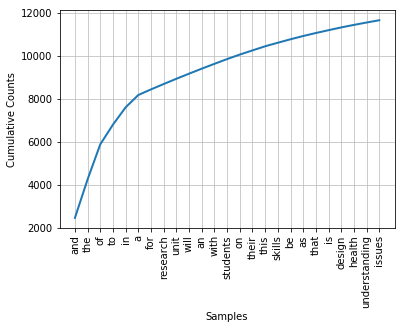

In [21]:
fd_1 = FreqDist(words_1)
print(fd_1.most_common(25))
fd_1.plot(25, cumulative=True)


## 7. Context-independent Stop words

To remove the context-independent stop words we use the file that has been provided. We read the file and the words are removed from the dictionary.

In [22]:
stopwords = []
with open('./stopwords_en/stopwords_en.txt') as f:
    stopwords = f.read().splitlines()

The below code removes the words. One thing to not here is that even though the list of stop words is unique, we still convert it into set for faster performance because it provides hashing for its keys and it becomes much optimised while using the 'in' operator.

In [23]:
stopwordsSet = set(stopwords)
for unit_id,text in units_raw.items():
    units_raw[unit_id] = [w for w in units_raw[unit_id] if w not in stopwordsSet]

Now we remove the words that have a length less than 3 as asked in the requirement.

In [24]:
for unit_id,text in units_raw.items():
    units_raw[unit_id] = [w for w in units_raw[unit_id] if len(w) >= 3]

After removing these context-independent stop words, the vocab has reduced quite a lot. Below are the current stats.

In [25]:
words_1 = list(chain.from_iterable(units_raw.values()))
vocab_1 = set(words_1)
lexical_diversity_1 = len(words_1)/len(vocab_1)
print ("Vocabulary size: ",len(vocab_1),"\nTotal number of tokens: ", len(words_1), \
"\nLexical diversity: ", lexical_diversity_1)

Vocabulary size:  3822 
Total number of tokens:  18983 
Lexical diversity:  4.966771323914181


## 8. Context-dependent stop words (threshold of 95%)

Context-dependent stop words are the ones, which are repeating w.r.t. these documents and hence are dependent on contexts but because of very hight frequency wont be useful for us. We have considered the threshold of 95% in this case. 

Below picture shows the frequency of frequency of words. 

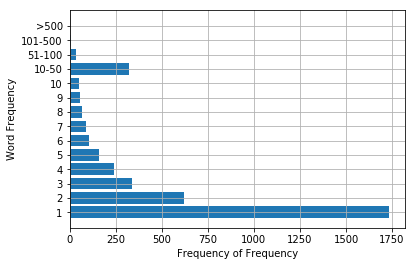

In [26]:
words_3 = list(chain.from_iterable(units_raw.values()))
fd_3 = FreqDist(words_3)
ffd = FreqDist(fd_3.values())
y = [0]*14
for k, v in ffd.items():
     if k <= 10:
        y[k-1] = v
     elif k >10 and k <= 50:
        y[10] =  y[10] + v
     elif k >50 and k <= 100:
        y[11] =  y[11] + v
     elif k > 100 and k <= 500:
        y[12] =  y[12] + v
     else:
        y[13] =  y[13] + v
x = range(1, 15) # generate integer from 1 to 14
ytks =list(map(str, range(1, 11))) # covert a integer list to a string list
ytks.append('10-50')
ytks.append('51-100')
ytks.append('101-500')
ytks.append('>500')
barh(x,y, align='center')
yticks(x, ytks)
xlabel('Frequency of Frequency')
ylabel('Word Frequency')
grid(True)

A big bar at 1 indicates that there are a lot of words that happen only once, and hence are useless to us and they would be removed in the next step of removing rare tokens. 

The below code calculates the document frequency of all the tokens. 

In [27]:
doc_freq = {}
for word in set(words_1):
    count = 0
    for k,val in units_raw.items():
        if word in val:
            count += 1
    doc_freq[word] = count

In [28]:
print("Document frequence of all the words: ", doc_freq)

Document frequence of all the words:  {'Computational': 1, 'prototypical': 1, 'non-accidental': 1, 'non-traditional': 2, 'adjustment': 1, 'defendants': 1, 'India': 2, 'test': 4, 'micro': 1, 'ability': 32, 'dark': 1, 'microorganisms': 1, 'critiqued': 1, 'discuss': 25, 'meaningful': 3, 'matter': 1, 'gather': 3, "coroner's": 1, 'cater': 1, 'possess': 1, 'booth': 1, 'non-English': 1, 'venture': 2, 'interrelation': 1, 'linguistic': 4, 'raise': 1, 'concisely': 1, 'attributed': 1, 'location-awareness': 1, 'perception': 2, 'Skill': 1, 'bias': 1, 'discrimination': 1, 'drugs': 3, 'particles': 1, 'businesses': 4, 'relationship': 22, 'registers': 1, 'Assess': 2, 'Make': 1, 'controversy': 1, 'DNA': 1, 'changing': 2, 'Illustrate': 1, 'uncertain': 1, 'distribution': 5, 'demands': 4, 'workplace': 6, 'move': 1, 'contexts': 27, 'shared': 3, 'cross': 1, 'effectively': 19, 'meant': 1, 'NUR2229': 1, 'risks': 5, 'simple': 6, 'reducing': 1, 'subrogation': 1, 'interpret': 14, 'spoilage': 1, 'Art': 2, 'healing

Now, since we are dealing with 194 units because of unit repetitions, our 95% threshold becomes, 0.95*194 = 184.3 which is rounded to 184. 

In [29]:
thresh_95_words = []
for k,val in doc_freq.items():
    if(val>184):
        thresh_95_words.append(k)

We see that there are no words that occur in more than 95% of documents.

In [30]:
print("95% threshold words: ", thresh_95_words)

95% threshold words:  []


In [31]:
for unit_id,text in units_raw.items():
    units_raw[unit_id] = [w for w in units_raw[unit_id] if w not in thresh_95_words]

## 9. Rare tokens removal (5% threshold)

Now, since we are dealing with 194 units because of unit repetitions, our 5% threshold becomes, 0.05*194 = 9.7 which is rounded to 10.

By doing this, we also remove all the bigrams because they were rarely occuring. If we would have removed the stop words and then calculated the bigrams, there was a possibility that some of the bigrams would remain. But again, I feel the approach that is done is more justified, because if we remove stop words first and then calculate the bigrams, we would have got some bigrams which actually dont exist as explained in the bigrams extraction section.

Also, if we dont remove the bigrams as rare tokens, then we would have the bigrams which occur very rarely, may be even just once and they remain in the vocab, which again does not make sense because we need bigrams which make sense. 

In [32]:
thresh_5_words = []
for k,val in doc_freq.items():
    if(val<10):
        thresh_5_words.append(k)

In [33]:
print("5% threshold words: ", thresh_5_words)

5% threshold words:  ['Computational', 'prototypical', 'non-accidental', 'non-traditional', 'adjustment', 'defendants', 'India', 'test', 'micro', 'dark', 'microorganisms', 'critiqued', 'meaningful', 'matter', 'gather', "coroner's", 'cater', 'possess', 'booth', 'non-English', 'venture', 'interrelation', 'linguistic', 'raise', 'concisely', 'attributed', 'location-awareness', 'perception', 'Skill', 'bias', 'discrimination', 'drugs', 'particles', 'businesses', 'registers', 'Assess', 'Make', 'controversy', 'DNA', 'changing', 'Illustrate', 'uncertain', 'distribution', 'demands', 'workplace', 'move', 'shared', 'cross', 'meant', 'NUR2229', 'risks', 'simple', 'reducing', 'subrogation', 'spoilage', 'Art', 'healing', 'interactive', 'coverage', 'CAM', 'rationale', 'Society', 'bio', 'seminar', 'professions', 'vehicles', 'budgetary', 'functioning', 'detected', 'manipulation', 'respect', 'infection', 'aspect', 'fluid', 'progresses', 'German', 'predisposing_protective', 'imagery', 'recent', 'barriers'

We see that there are a lot of words that have occured rarely and hence we remove them using the below code.

In [34]:
for unit_id,text in units_raw.items():
    units_raw[unit_id] = [w for w in units_raw[unit_id] if w not in thresh_5_words]

Lets have a look at the stats again in more detail this time.

In [35]:
words = list(chain.from_iterable(units_raw.values()))
vocab = set(words)
print ("Vocabulary size: ",len(vocab))
print ("Total number of tokens: ", len(words))
print ("Lexical diversity: ", lexical_diversity)
print ("Total number of articles:", len(units_raw))
lens = [len(value) for value in units_raw.values()]
print ("Average document length:", np.mean(lens))
print ("Maximun document length:", np.max(lens))
print ("Minimun document length:", np.min(lens))
print ("Standard deviation of document length:", np.std(lens))

Vocabulary size:  277
Total number of tokens:  9029
Lexical diversity:  7.561695153359869
Total number of articles: 194
Average document length: 46.54123711340206
Maximun document length: 122
Minimun document length: 0
Standard deviation of document length: 19.09177105930434


Key point to notice is the reduction in our vocab after removing the rare tokens. 

## 10. Stemming

Now, a lot of words occur from the same origin, for eg. meets, meeting etc but they come from the same origin word 'meet'. So to convert these words, we use a Porter Stemmer provided by nltk.

We Stem the words and store them in dictionary but we dont stem the bigrams that were included. 

In [36]:
stemmer = PorterStemmer()
for unit_id,text in units_raw.items():
    units_raw[unit_id] = [stemmer.stem(w) if '_' not in w else w for w in units_raw[unit_id]]

Below are the stats that we have after stemming.

In [37]:
words_1 = list(chain.from_iterable(units_raw.values()))
vocab_1 = set(words_1)
lexical_diversity_1 = len(words_1)/len(vocab_1)
print ("Vocabulary size: ",len(vocab_1),"\nTotal number of tokens: ", len(words_1), \
"\nLexical diversity: ", lexical_diversity_1)

Vocabulary size:  218 
Total number of tokens:  9029 
Lexical diversity:  41.41743119266055


## 11. Write to Output files

Now, we finally write to the output files as specified in the specification.

In [38]:
words = list(chain.from_iterable(units_raw.values()))
vocab = list(sorted(set(words)))
vocab_dict = {}

i = 0
for w in vocab:
    vocab_dict[w] = i
    i = i + 1
with open("29620163_vocab.txt", 'w') as outfile:
    for k,v in vocab_dict.items():
        outfile.write("{}:{}\n".format(k,v))

with open("29620163_countVec.txt", 'w') as out_file:
    for u,d in units_raw.items():
        out = ""
        out += u + ","
        d_idx = [vocab_dict[w] for w in d]
        for k, v in FreqDist(d_idx).items():
            out += str(k) + ":" + str(v) + ","
        out = out[:-1]
        out += "\n"
        out_file.write(out)

## 12. Summary

The output files are generated as specified in the requirement. There are few things that can be improved is the extraction of bigrams specially and extract more relavant bigrams based on applying the frequency filter. In that case they wouldn't have been removed as rare tokens. Other explaination have been provided in the sections above as and when necessary. 

## 13. References

* Monash Moodle for FIT5196 https://lms.monash.edu/course/view.php?id=50799
* Website to verify Regular Expressions https://regex101.com/
* How to count the frequency of the elements in a list? https://stackoverflow.com/questions/2161752/how-to-count-the-frequency-of-the-elements-in-a-list/2162045